In [2]:
import pandas as pd
df = pd.read_csv("bike_data_new.csv")
df.head()
# print(type(df["ended_at"]))

trip_id                    136
started_at    01-02-2023 06:08
ended_at      01-02-2023 06:08
start_lat              38.9101
start_lng             -77.0444
end_lat                38.9101
end_lng               -77.0444
Name: 135, dtype: object

In [4]:
from datetime import datetime
def time_diff(t2, t1):
  et = t2
  st = t1
  # print(st, et)
  delta = datetime.strptime(et, "%d-%m-%Y %H:%M") - datetime.strptime(st, "%d-%m-%Y %H:%M")
  return delta.total_seconds()/60

time_diff("01-02-2023 00:03","01-02-2023 00:03")

0.0

In [6]:
#TODO -- Task 1

import time
start_time = time.time()

# print(df.loc[0]['duration']
df["duration"] =[0 for _ in range (df['trip_id'].count()) ]
print(df['duration'][135])
# print(df['trip_id'].count())
ct=0
for i in range(df['trip_id'].count()-1):
  if (df['start_lat'][i]==df['end_lat'][i]) & (df['start_lng'][i]==df['end_lng'][i]):
      ct+=1
  if(df.loc[i]["ended_at"]==df.loc[i]["started_at"]):
    df['duration'][i]=0
    continue
  temp=time_diff(df["ended_at"][i],df["started_at"][i])
  if(temp>0):
    df['duration'][i]=temp

# df.head()
 # Remove all trips with duration 0 minutes
df = df[df['duration'] > 0]

    # Find the maximum and minimum duration of the trips
max_duration = df['duration'].max()
min_duration = df['duration'].min()

# Calculate the total number of trips corresponding to the minimum duration
num_min_duration_trips = df[df['duration'] == min_duration].shape[0]

# Calculate the percentage of total circular trips

num_circular_trips = ct
total_trips = df.shape[0]
percent_circular_trips = (num_circular_trips / total_trips) * 100

    # Calculate the runtime of the function
end_time = time.time()
runtime = end_time - start_time

    # Print the requested values on the console
print("Number of zero duration trip is :",6867-df['trip_id'].count())
print("Maximum duration of trip (in minutes):", max_duration)
print("Minimum duration of trip (in minutes):", min_duration)
print("Total number of trips corresponding to the minimum duration:", num_min_duration_trips)
print("Percentage of total circular trips:", percent_circular_trips)
print("Runtime of the function (in seconds):", runtime)
# df = df[df["diff"]>0]
# df.head()

0


<ipython-input-6-7780b98b9d10>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=temp
<ipython-input-6-7780b98b9d10>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=0


Number of zero duration trip is : 47
Maximum duration of trip (in minutes): 518
Minimum duration of trip (in minutes): 1
Total number of trips corresponding to the minimum duration: 89
Percentage of total circular trips: 3.035190615835777
Runtime of the function (in seconds): 4.875218868255615


In [7]:
#TODO -- Task 2


df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Filter the dataframe to include only trips starting between 06:00 AM and 06:00 PM
df_filtered = df.loc[(df['started_at'].dt.hour >= 6) & (df['started_at'].dt.hour < 18)]
# print(df_filtered.head())
# Create a dictionary of end locations for each trip
end_locations = {}
for i, trip in df_filtered.iterrows():
    # print(i,trip)
    end_location = (trip['end_lat'], trip['end_lng'])
    end_time = trip['ended_at']
    # print("i",i,end_location,end_time)
    if end_location in end_locations:
        end_locations[end_location].append(end_time)
    else:
        end_locations[end_location] = [end_time]

# Find the total number of feasible pairs of trips
num_feasible_pairs = 0
for i, trip in df_filtered.iterrows():
    start_location = (trip['start_lat'],trip['start_lng'])
    end_time = trip['ended_at']
    if start_location in end_locations:
        for time in end_locations[start_location]:
            if end_time <= time:
                num_feasible_pairs += 1

# Print the total feasible pairs of trips and runtime
print(f"Total feasible pairs of trips: {num_feasible_pairs}")


Total feasible pairs of trips: 44476


In [9]:

!pip install --upgrade osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 71.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pa

In [3]:
#TODO -- Task 3


import pandas as pd
import networkx as nx
import matplotlib.cm as cm
import matplotlib.colors as colors
import osmnx as ox
import matplotlib.pyplot as plt

df = df.loc[df['trip_id'].isin(range(1, 101))]

# Find the number of unique depots used to serve these trips
num_depots = df[['start_lat', 'start_lng', 'end_lat', 'end_lng']].nunique()

# Download the graph for the study area
place_name = "Washington, DC, USA"
G = ox.graph_from_point((38.20, -77.10), dist=30000,network_type='walk')


<ipython-input-4-974ab05eb744>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(G))


[(153262153, {'y': 38.1945409, 'x': -77.0931575, 'street_count': 1}), (153265154, {'y': 38.1783296, 'x': -77.0718566, 'street_count': 3}), (153265157, {'y': 38.178371, 'x': -77.073802, 'street_count': 1}), (153265162, {'y': 38.1848512, 'x': -77.0688072, 'street_count': 1}), (153265168, {'y': 38.185331, 'x': -77.067429, 'street_count': 3}), (153265377, {'y': 38.201131, 'x': -77.0864272, 'street_count': 3}), (153265392, {'y': 38.200559, 'x': -77.0880962, 'street_count': 1}), (153265531, {'y': 38.2031983, 'x': -77.0703627, 'street_count': 3}), (153265783, {'y': 38.218344, 'x': -77.103951, 'street_count': 3}), (153269529, {'y': 38.174021, 'x': -77.0951843, 'street_count': 1}), (153271068, {'y': 38.2114327, 'x': -77.0512531, 'street_count': 3}), (153271102, {'y': 38.198159, 'x': -77.0847698, 'street_count': 3}), (153271219, {'y': 38.2285794, 'x': -77.115797, 'street_count': 3}), (153271261, {'y': 38.2275804, 'x': -77.1150913, 'street_count': 3}), (153274825, {'y': 38.1919286, 'x': -77.07475

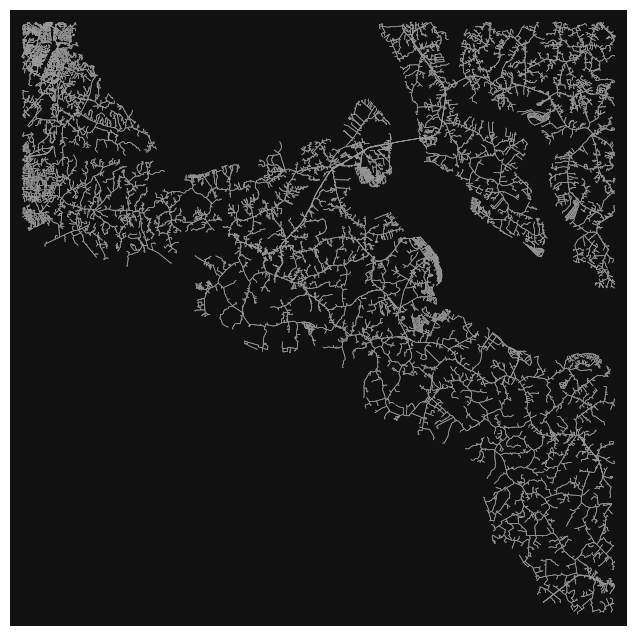

In [4]:
cmap = cm.get_cmap('tab20', len(G))
print(G.nodes.data())
# convert node and edge attributes to lists
node_colors = [colors.rgb2hex(cmap(i)[:3]) for i in range(len(G))]
# edge_colors = [node_colors[G.nodes[n]['osmid']] for u, v, n in G.edges(keys=True)]

# plot the street network with colored edges
fig, ax = ox.plot_graph(G, node_color=node_colors, node_size=0, edge_linewidth=0.5, show=False, close=False)

# show the plot
plt.show()

In [28]:
import time
# Find the nearest node in the graph corresponding to each depot
start_time = time.time()
G_projected = ox.project_graph(G)
depots = df[['start_lat', 'start_lng', 'end_lat', 'end_lng']].values
depot_lats = depots[:, [0, 2]].flatten()
depot_lngs = depots[:, [1, 3]].flatten()
depot_nodes = ox.nearest_nodes(G_projected, depot_lats, depot_lngs)
# print(depots)
# print(depot_lats)
# print(depot_lngs)
# print(depot_nodes)
# Calculate the shortest path distance between every pair of nodes
print(set(depot_nodes))
distances = []
for i in range(len(depot_nodes)):
    for j in range(i+1, len(depot_nodes)):
        try:
            distance = nx.shortest_path_length(G, depot_nodes[i], depot_nodes[j], weight='length')
            if distance > 0:
                distances.append(distance)
        except nx.NetworkXNoPath:
            pass
        # print(f"Shortest distace between {depot_nodes[i]} and {depot_nodes[j]} is : {distance}")

# Print the number of unique depots and the shortest path distance statistics

unique_depots = set(df['start_lat'].unique()) | set(df['end_lat'].unique())
num_depots = len(unique_depots)
print("Number of unique depots used:", len(set(depot_nodes)))
print(f"Total runtime: {time.time()-start_time:.2f} seconds")
if distances: 
    print(f"Minimum distance: {min(distances)} meters")
    print(f"Maximum distance: {max(distances)} meters")
else:
    print("No feasible paths found between any pair of depots.")

{218522241}
Number of unique depots used: 1
Total runtime: 7.90 seconds
No feasible paths found between any pair of depots.
